#1. 데이터 불러오기, 전처리

###1-1. 결측치 처리, 이진 데이터형 처리

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataMining/data/health_data.csv", encoding = 'utf-8')
data.head()

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
0,2020,1,36,M,9,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,No,No,0,NaN,NaN,12/29/2021
1,2020,2,27,F,13,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,No,No,0,NaN,NaN,12/29/2021
2,2020,3,11,F,12,155,55,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,No,No,0,NaN,NaN,12/29/2021
3,2020,4,31,M,13,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,No,No,1,0.0,0.0,12/29/2021
4,2020,5,41,F,12,155,50,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,No,No,0,NaN,NaN,12/29/2021


In [3]:
data['흡연'] = 0
data.loc[data['흡연상태'] == 'No', '흡연'] = 0 #비흡연
data.loc[(data['흡연상태'] == 'NotNow'), '흡연'] = 1 #금연
data.loc[(data['흡연상태'] == 'Yes'), '흡연'] = 2 #흡연

In [4]:
data['음주'] = 0
data.loc[data['음주여부'] == 'No', '음주'] = 0 #금주
data.loc[(data['음주여부'] == 'Yes'), '음주'] = 1 #음주

###1-2. 파생변수 'BMI' 만들기

In [5]:
#BMI지수 계산 : 몸무게(kg)/신장(m)^2
data['BMI지수'] = data['체중(5Kg 단위)'] / ((data['신장(5Cm단위)'] * 0.01) * (data['신장(5Cm단위)'] * 0.01))
data['BMI지수']

0       22.038567
1       28.888889
2       22.892820
3       27.343750
4       20.811655
          ...    
9995    22.892820
9996    21.484375
9997    31.250000
9998    22.892820
9999    29.296875
Name: BMI지수, Length: 10000, dtype: float64

In [6]:
data['BMI'] = 0
data.loc[data['BMI지수'] <= 18.5, 'BMI'] = 0 #저체중
data.loc[(data['BMI지수'] > 18.5) & (data['BMI지수'] < 23), 'BMI'] = 1 #정상
data.loc[(data['BMI지수'] >= 23) & (data['BMI지수'] < 25), 'BMI'] = 2 #과체중
data.loc[data['BMI지수'] >= 25, 'BMI'] = 3 #비만

In [7]:
data.head()

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자,흡연,음주,BMI지수,BMI
0,2020,1,36,M,9,165,60,72.1,1.2,1.5,...,No,No,0,NaN,NaN,12/29/2021,0,0,22.038567,1
1,2020,2,27,F,13,150,65,81.0,0.8,0.8,...,No,No,0,NaN,NaN,12/29/2021,0,0,28.888889,3
2,2020,3,11,F,12,155,55,70.0,0.6,0.7,...,No,No,0,NaN,NaN,12/29/2021,0,0,22.892820,1
3,2020,4,31,M,13,160,70,90.8,1.0,1.0,...,No,No,1,0.0,0.0,12/29/2021,0,0,27.343750,3
4,2020,5,41,F,12,155,50,75.2,1.5,1.2,...,No,No,0,NaN,NaN,12/29/2021,0,0,20.811655,1


###1-3. 파생변수이자 종속변수 '당뇨여부' 만들기

In [8]:
data['당뇨여부'] = 0
data.loc[data['식전혈당(공복혈당)'] < 126, '당뇨여부'] = 0 #정상
data.loc[(data['식전혈당(공복혈당)'] >= 126), '당뇨여부'] = 1 #당뇨

당뇨는, 공복혈당 수치가 126mg 이상일 때 진단된다.

In [9]:
data = data[['BMI', '흡연', '음주', '혈청크레아티닌', '혈색소', '총콜레스테롤', '당뇨여부']]
data = data.dropna()
data.head()

,BMI,흡연,음주,혈청크레아티닌,혈색소,총콜레스테롤,당뇨여부
0,1,0,0,1.1,15.0,188.0,0
4,1,0,0,0.7,12.4,220.0,0
5,2,2,1,1.1,16.4,234.0,0
6,3,2,1,0.7,15.7,119.0,1
8,1,0,0,0.7,13.3,177.0,0


#2. 분류

###2-1. 의사결정나무 만들기

독립변수가 6개로, 많지 않기 때문에 단일 의사결정나무를 사용하기로 결정했다.

In [10]:
%matplotlib inline
import seaborn as sns

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X = data.iloc[:, :-1]
y = data.iloc[:, -1]   #당뇨여부

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

tree = DecisionTreeClassifier(max_depth=4, random_state=0)  
tree.fit(X_train, y_train)
print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 0.902
시험용 데이터 정확도: 0.900


단일 의사결정나무 모델에서 max_depth가 4일 때 가장 높은 정확도를 기록했다.

In [12]:
result = tree.feature_importances_
print("변수의 중요도:\n", result)

변수의 중요도:
 [0.02293608 0.03977841 0.         0.12491669 0.23695649 0.57541234]


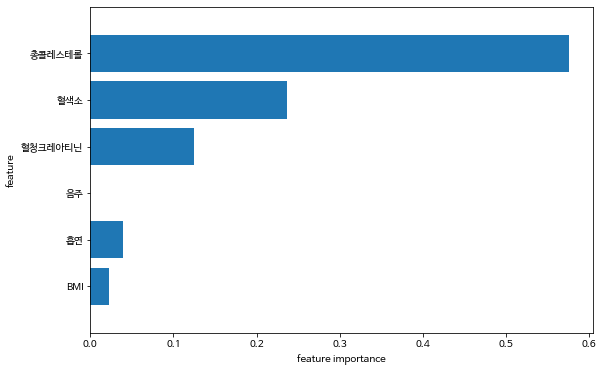

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False
from matplotlib import font_manager

plt.rc('font', family='NanumBarunGothic')

def plot_feature_importances_wisc(model):
    plt.rcParams["figure.figsize"] = (9,6)
    n_features = len(data.columns[:-1])  # 30개 
    plt.barh(np.arange(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), data.columns[:-1])   # 30개의 눈금을 표시하고 눈금 레이블을 변수 이름으로 지정
    plt.xlabel("feature importance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features) #Y 축 범위 지정 (-1 ~ 30)

plot_feature_importances_wisc(tree)

독립변수 중에서 총콜레스테롤이 가장 중요도가 크고, 그 다음으로 혈색소와 혈청크레아티닌 순서대로 중요했다.
또한, 당뇨와 음주의 관계를 찾아보기 힘들었다.

###2-2. GradientBoosting 활용하기

두 가지 결과와 그 값을 비교하기 위해, Gradient Boosting 모델을 활용하여 비교해보기로 결정했다.

In [14]:
from sklearn.ensemble import GradientBoostingClassifier
# 기본값은 max_depth= 3, n_estimators=100, learning_rate = 0.1

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

In [15]:
print("학습용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습용 데이터 세트 정확도: 0.911
시험용 데이터 세트 정확도: 0.899


In [16]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=2)
gbrt.fit(X_train, y_train)

print("학습 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습 데이터 세트 정확도: 0.904
시험용 데이터 세트 정확도: 0.899


In [17]:
#학습률 감소
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("학습 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습 데이터 세트 정확도: 0.898
시험용 데이터 세트 정확도: 0.898


#3. 분류모델 평가 및 최종 인사이트 도출

###3-1. 교차 검증

In [20]:
from sklearn.model_selection import cross_val_score

dt_scores = cross_val_score(tree, X_train, y_train, cv=10, scoring='accuracy')  
gbrt_scores = cross_val_score(gbrt, X_train, y_train, cv=10, scoring='accuracy')

print("Accuracy")
print("Decision tree: ", dt_scores) 
print("Gradient boosting: ", gbrt_scores) 

print("Accuracy mean")
print("Decision tree :{:.3f}".format(dt_scores.mean())) 
print("Gradient boosting :{:.3f}".format(gbrt_scores.mean())) 

Accuracy
Decision tree:  [0.90131579 0.90131579 0.89144737 0.9009901  0.89108911 0.88778878
 0.89108911 0.89108911 0.88448845 0.89768977]
Gradient boosting:  [0.89802632 0.89802632 0.89802632 0.9009901  0.89768977 0.89768977
 0.89768977 0.89768977 0.89438944 0.89768977]
Accuracy mean
Decision tree :0.894
Gradient boosting :0.898


###3-2. 모델평가 지표

당뇨병의 유무를 판단하기 위한 분류 시도였으므로, 재현율이 가장 중요한 지표라고 생각하였다.



> 재현율(recall = sensitivity = TP/(TP+FN))이 상대적으로 더 중요한 지표인 경우는 실제로 Positive인 데이터 예측을 Negative로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우



In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix 

print(y_test.value_counts()) # y_test 의 B,M 분포

dt_pred = tree.predict(X_test)
gbrt_pred = gbrt.predict(X_test)

# 예측 결과인 pred와 실제 결과인 y_test의 Confusion Matrix 출력
print('Decision tree 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, dt_pred)))
print(confusion_matrix(y_test, dt_pred))
print('Gradient boosting 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, gbrt_pred)))
print(confusion_matrix(y_test, gbrt_pred))

0    908
1    103
Name: 당뇨여부, dtype: int64
Decision tree 시험용 데이터 세트 정확도:0.900
[[905   3]
 [ 98   5]]
Gradient boosting 시험용 데이터 세트 정확도:0.898
[[908   0]
 [103   0]]


In [25]:
print('의사결정나무 재현율:{:.3f}'.format(recall_score(y_test, dt_pred, average='binary')))
print('그래디언트 부스팅 재현율:{:.3f}'.format(recall_score(y_test, gbrt_pred, average='binary')))

의사결정나무 재현율:0.049
그래디언트 부스팅 재현율:0.000


정확도는 두 모델이 비슷하였으나, 재현율에서 근소하게 의사결정나무가 더 좋은 결과를 기록했다.
하지만, 당뇨 판정에 있어 두 모델 다 효과적인 결과를 보이지는 않았다.
또한, 위의 결과에서 당뇨에 있어서 콜레스테롤이 가장 중요한 변수로 작용함을 알게 되었다. 콜레스테롤과 관련된 또 다른 칼럼들을 독립변수로 추출하여 모델을 다시 만든다면 더 나은 재현율을 보일 수 있을 것 같다.